# B_b_4 : Regroupement des données importées

L'objectif de cette étape de l'obtention des données est de regrouper l'ensemble des données de météo et demande dans un même dataframe, ce qui permettra l'analyse préliminaire exploratoire (EDA) dans la prochaine étape. 

In [1]:
! ls -la ../data/interim/*.parquet

-rw-r--r--  1 brunogauthier  staff  528107 15 nov 19:27 ../data/interim/hist_prev_meteo.parquet
-rw-r--r--  1 brunogauthier  staff  566491 15 nov 19:27 ../data/interim/historique_demande_HQ.parquet
-rw-r--r--  1 brunogauthier  staff    3425 15 nov 19:27 ../data/interim/quotidien_demande_HQ.parquet


Nous savons que nous avons une série continue de températures entre le 1er janv 2018 et la date d'aujourd'hui + 16 jours. 

Par contre, nous avons actuellement un vide entre les données historiques de demande et la demande quotidienne dont nous avons débuté l'enregistrement grâce à Github actions. 

Lorsque les données historiques de 2023 seront disponibles et ajoutés à notre dossier de données brutes, nous serons en mesure d'obtenir d'avoir une série continue.

Dans cette partie du travail, nous allons préparer le regroupement des demandes électriques, de la même façon que nous avons traité les températures historique et prédites. 

In [17]:
%load_ext jupyter_black

# import black
# import jupyter_black

# jupyter_black.load(
#     lab=True,
#     line_length=55,
#     target_version=black.TargetVersion.PY311,
# )

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from references import colors_pal

plt.style.use("fivethirtyeight")

In [4]:
path_to_interim_data = "../data/interim/"
demande_quotidien_parquet = "quotidien_demande_HQ.parquet"
demande_historique_parquet = "historique_demande_HQ.parquet"

In [5]:
d_quotidien = pd.read_parquet(
    path=os.path.join(path_to_interim_data, demande_quotidien_parquet),
    engine="pyarrow",
)

In [6]:
d_hist = pd.read_parquet(
    path=os.path.join(path_to_interim_data, demande_historique_parquet),
    engine="pyarrow",
)

In [7]:
demandes = d_hist.rename(columns={"MW": "Historique"}).join(
    d_quotidien.rename(columns={"MW": "Prédiction"}), how="outer"
)
demandes

,Historique,Prédiction
date,,
2019-01-01 01:00:00,23762.55,NaN
2019-01-01 02:00:00,23830.23,NaN
2019-01-01 03:00:00,23608.07,NaN
2019-01-01 04:00:00,23562.48,NaN
2019-01-01 05:00:00,23546.16,NaN
...,...,...
2023-11-15 14:00:00,NaN,21575.75
2023-11-15 15:00:00,NaN,22152.75
2023-11-15 16:00:00,NaN,23304.00


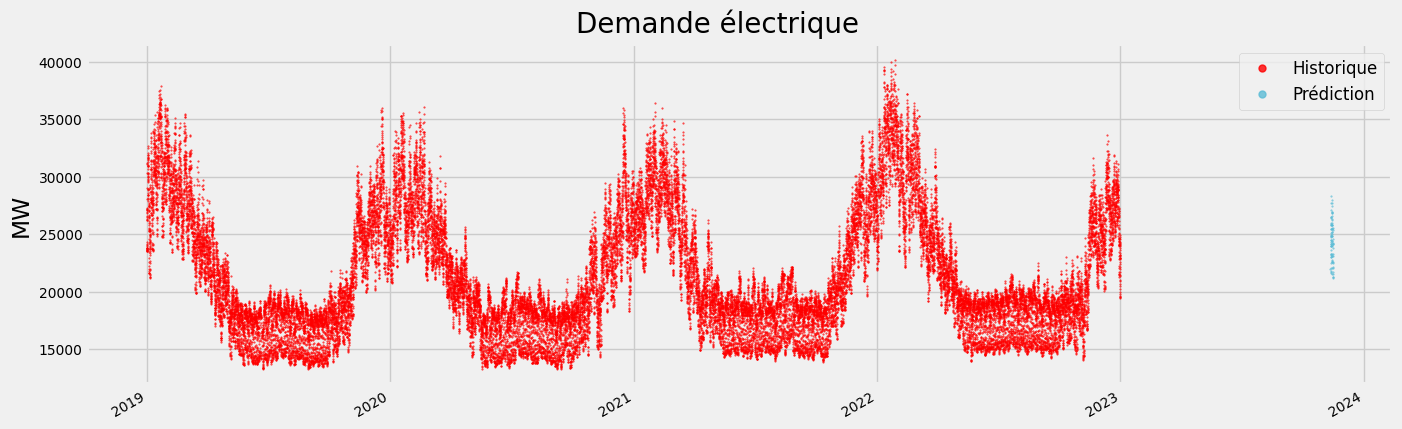

In [8]:
demandes.plot(
    figsize=(15, 5),
    xlabel="",
    ylabel="MW",
    fontsize=10,
    style=".",
    ms=1.0,
    alpha=0.8,
    color=[colors_pal[0], colors_pal[4]],
)

plt.suptitle("Demande électrique", y=0.95, fontsize=20)
plt.legend(loc="upper right", markerscale=10.0, scatterpoints=1, fontsize=12)

plt.show()

## Regroupement des historiques et prévisions de la demande électrique

In [13]:
demandes["MW"] = demandes.mean(axis=1)
df_demande = demandes.drop(columns=["Historique", "Prédiction"])

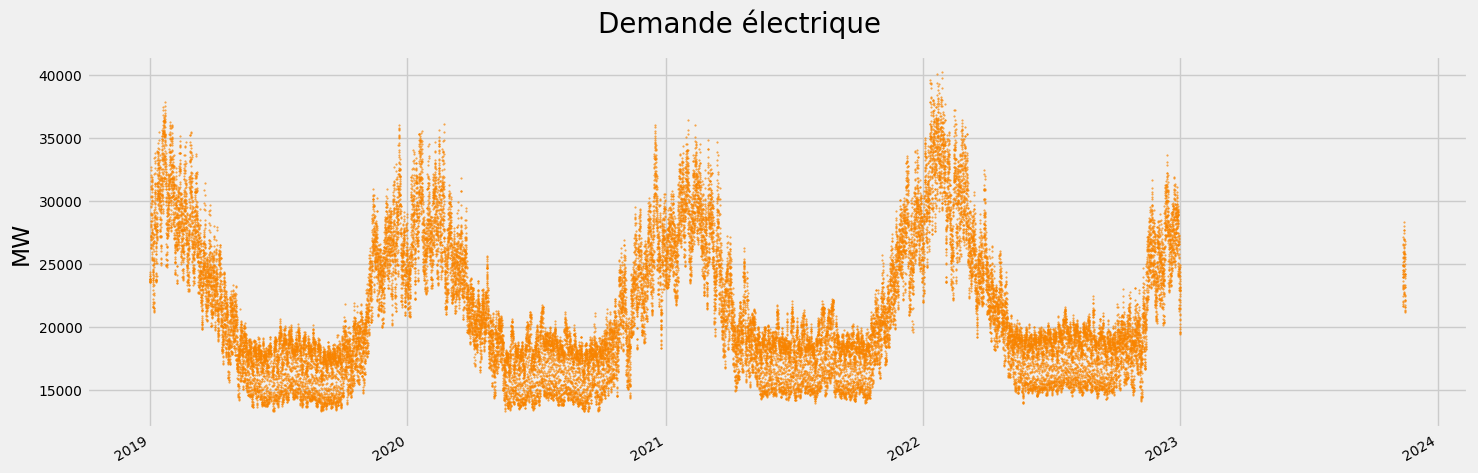

In [14]:
df_demande.plot(
    figsize=(15, 5),
    xlabel="",
    ylabel="MW",
    fontsize=10,
    style=".",
    legend=None,
    ms=1.0,
    alpha=0.8,
    color=colors_pal[3],
)

plt.suptitle("Demande électrique", y=0.95, fontsize=20)
plt.tight_layout()
plt.show()

Nous pouvons bien voir que nous avons le même graphique, mais toutes les données sont dans la même colonne.

## Ajout des données de températures

Nous avons déjà regroupé les températures dans la même série.

In [11]:
temperature_parquet = "hist_prev_meteo.parquet"

tf = pd.read_parquet(
    path=os.path.join(path_to_interim_data, temperature_parquet),
    engine="pyarrow",
)
tf

,temp
date,
2018-01-01 00:00:00,-24.4
2018-01-01 01:00:00,-24.9
2018-01-01 02:00:00,-25.1
2018-01-01 03:00:00,-25.3
2018-01-01 04:00:00,-25.6
...,...
2023-11-30 19:00:00,-1.7
2023-11-30 20:00:00,-2.5
2023-11-30 21:00:00,-3.5


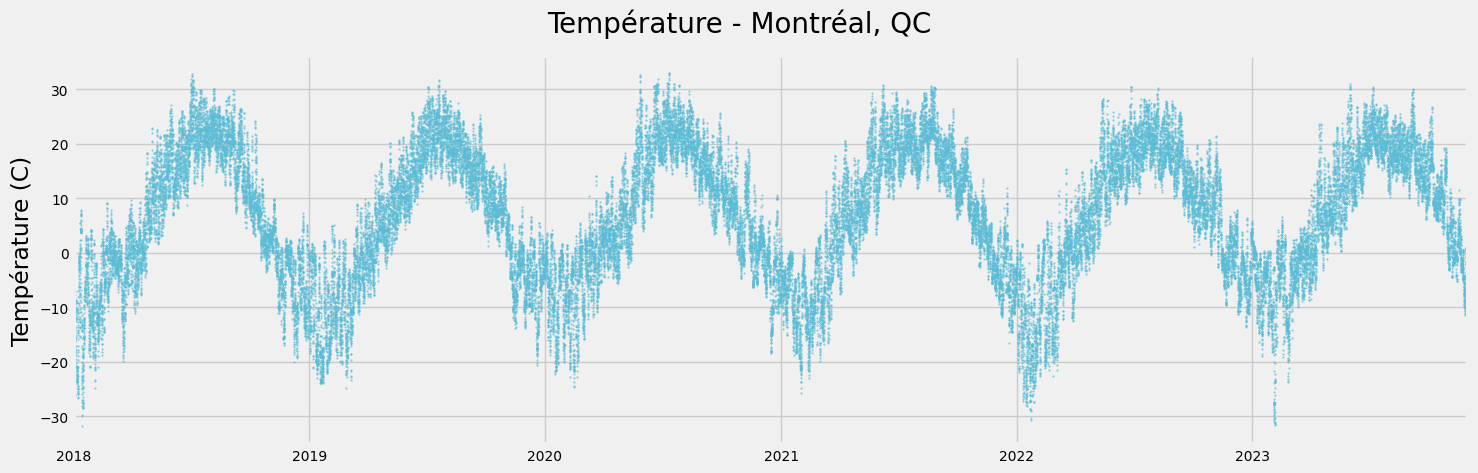

In [12]:
tf.plot(
    figsize=(15, 5),
    xlabel="",
    ylabel="Température (C)",
    fontsize=10,
    style=".",
    legend=None,
    ms=1.0,
    alpha=0.8,
    color=colors_pal[4],
)

plt.suptitle("Température - Montréal, QC", y=0.95, fontsize=20)
plt.tight_layout()
plt.show()

## Regroupement de température et demande

In [22]:
df = df_demande.join(tf, how="outer").rename(columns={"temp": "Temp"})
df

,MW,Temp
date,,
2018-01-01 00:00:00,NaN,-24.4
2018-01-01 01:00:00,NaN,-24.9
2018-01-01 02:00:00,NaN,-25.1
2018-01-01 03:00:00,NaN,-25.3
2018-01-01 04:00:00,NaN,-25.6
...,...,...
2023-11-30 19:00:00,NaN,-1.7
2023-11-30 20:00:00,NaN,-2.5
2023-11-30 21:00:00,NaN,-3.5


Pour faciliter la visualisation, nous options pour un graphique possédant un axe des y double. 

In [79]:
def plot_demande_temp(df, fin_titre=""):
    alpha, size = 0.4, 8

    fig, ax1 = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(15)

    color = colors_pal[0]
    ax1.set_xlabel("")
    ax1.set_ylabel("Demande (MW)", color=color)
    ax1.scatter(
        x=df.index,
        y=df.MW,
        color=color,
        s=size,
        alpha=alpha,
    )
    ax1.tick_params(axis="y", labelcolor=color)

    ax2 = ax1.twinx()

    color = colors_pal[4]
    ax2.set_ylabel("Température (C)", color=color)
    ax2.scatter(
        x=df.index,
        y=df.Temp,
        color=color,
        s=size,
        alpha=alpha,
    )
    ax2.tick_params(axis="y", labelcolor=color)

    plt.suptitle(
        f'Demande électrique en fonction de la température{" - " if fin_titre != "" else ""}{fin_titre}',
        y=0.95,
        fontsize=24,
    )

    fig.tight_layout()
    plt.show()

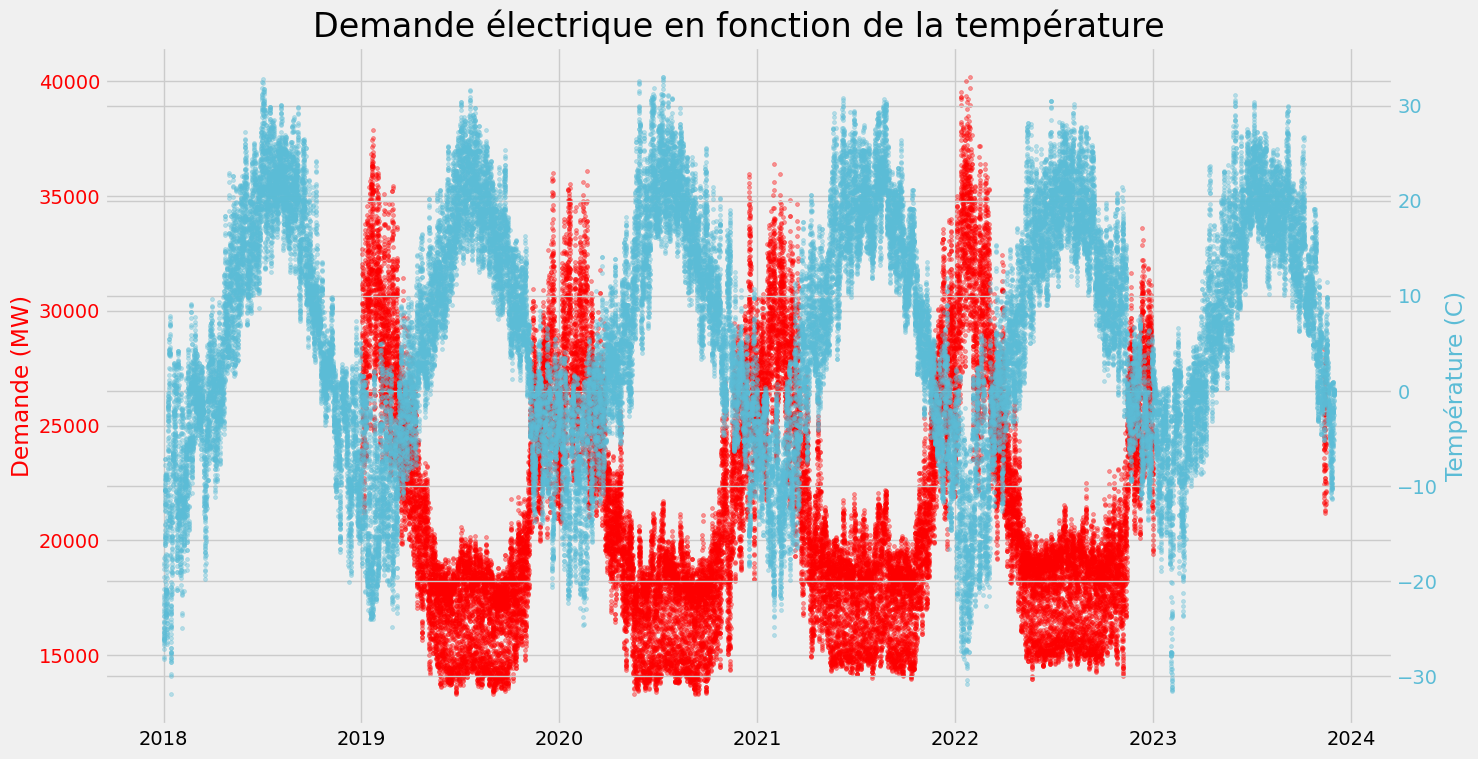

In [76]:
plot_demande_temp(df)

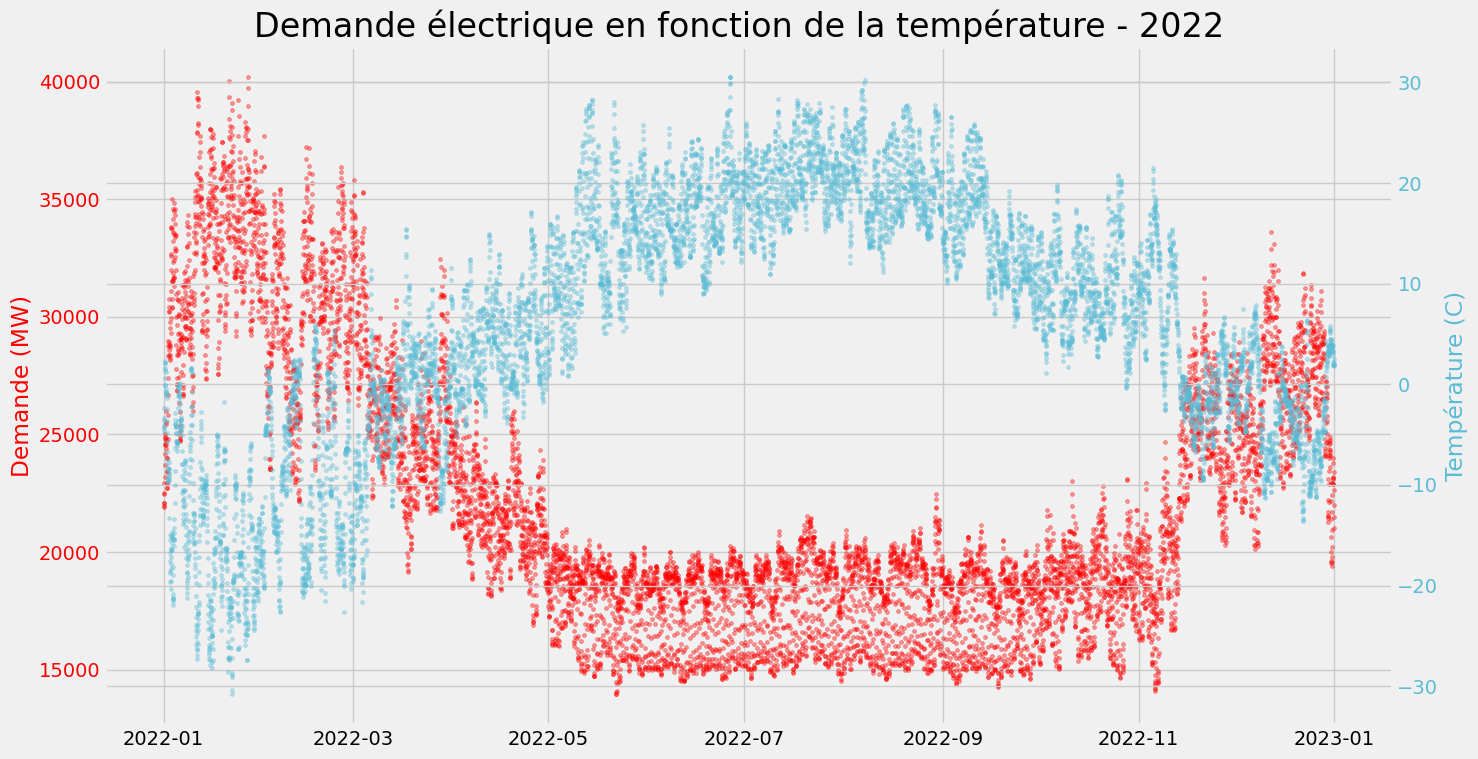

In [77]:
plot_demande_temp(df.loc[df.index.year == 2022], fin_titre=2022)

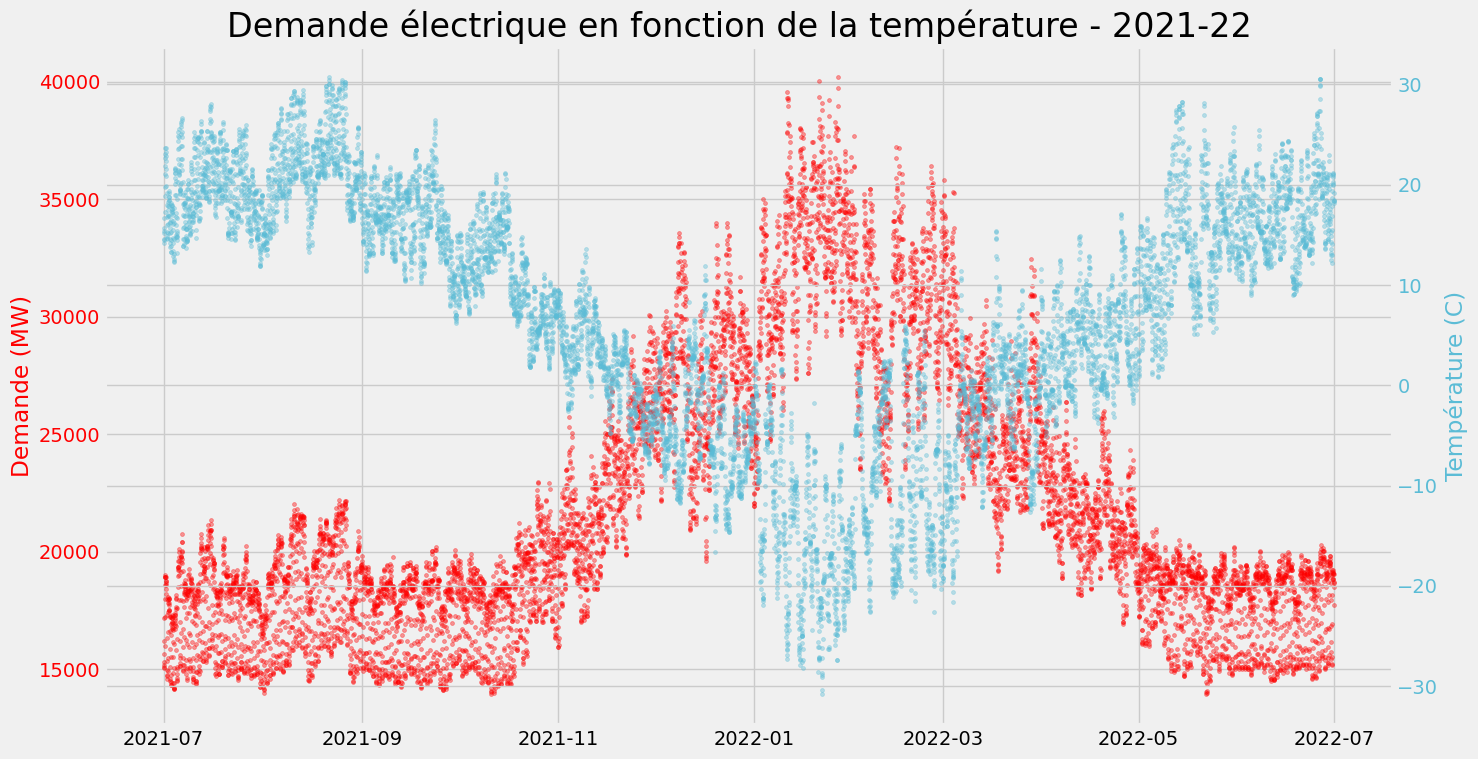

In [80]:
plot_demande_temp(df["20210701":"20220630"], fin_titre="2021-22")

## Résumé

Nous avons maintenant notre dataframe de données qui nous permettra d'aller de compléter notre analyse préliminaire, que nous avons quand même dû débuter en important toutes ces donnnées. 

Comme pour les autres étapes, nous allons ajouter ces manipulations à un fichier exécutable et l'ajouter au pipeline de données

Dans ce notebook, nous avons :

- regroupé les données de demandes en une seule série de données ;
- trouvé une solution pour rendre ces données continues à la jonction future : notre code fonctionnera lorsque nous importerons l'année 2023 ;
- regroupé les données de demandes et température dans un même dataframe ;
- effectué une visualisation des données regroupées ;
- sauvegardé ces données intérimaires en un format parquet, que nous allons réutiliser subséquemment ;
- créé un pipeline de données dans le dossier `src/data`, afin d'automatiser toute cette partie ;
- créé un pipeline automatique quotidien avec github action

Nous sommes maintenant prêt à passer à la prochaine étape d'exploration des données. 